In [1]:
import pandas as pd
import numpy as np
import NDCG as ndcg
import MHR as mhr
import sys
import types
ndcg.reload_package(mhr)
from sklearn.svm import SVR, LinearSVR
from sklearn.grid_search import GridSearchCV
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer
from time import time
%matplotlib inline

loading MHR


In [2]:
reviews_features = pd.read_csv('data/eletronic_sample_counts.csv.gz')
df_agg = reviews_features[['word_count','asin']].groupby(['asin']).agg(['count','mean'])
df_agg['word_count'].sort_values('count',ascending=False).head(10)

,count,mean
asin,,
B00BGA9WK2,351,253.079772
B00A3YN0Z0,219,104.237443
B0074BW614,201,451.900498
B00CMQTVK0,165,334.696970
B0094NY3R0,147,232.972789
B0045FM6SU,140,374.121429
B00DVFLJDS,139,352.625899
B009LL9VDG,133,424.443609
B002C7481G,132,501.636364


In [4]:
#list_asin = ['B00BGA9WK2','B00A3YN0Z0','B0074BW614','B00CMQTVK0','B0094NY3R0','B0045FM6SU','B00DVFLJDS']
#reviews_features = reviews_features[reviews_features.asin.isin(list_asin)]
#reviews_features.drop('powerWithStar', axis=1, inplace=True)
#reviews_features,ndcg_mhr = mhr.executeFromDf(reviews_features)
#reviews_features[reviews_features['asin']=='B00001WRSJ']

reviews_features,ndcg_mhr = mhr.executeFromDf(reviews_features)

#reviews_features.shape
reviews_features.to_csv('data/eletronic_sample_counts.csv.gz', compression='gzip')

product=1400532655 ndcg=0.877750740057 (0.877750740057)
product=B00000J061 ndcg=0.897996206254 (0.91824167245)
product=B00001P4ZH ndcg=0.905385753872 (0.920164849108)
product=B00001WRSJ ndcg=0.859513694467 (0.721897516252)
product=B000031KIM ndcg=0.880370848508 (0.963799464675)
product=B00004SB92 ndcg=0.884157973883 (0.903093600759)
product=B00004THCZ ndcg=0.895464014154 (0.963300255778)
product=B00004XOM3 ndcg=0.902419339812 (0.951106619418)
product=B00004ZCJE ndcg=0.901214600019 (0.891576681671)
product=B000053HC5 ndcg=0.8923838978 (0.812907577829)
product=B000053HH5 ndcg=0.901321571427 (0.9906983077)
product=B00005LEN4 ndcg=0.908762636925 (0.990614357408)
product=B000062VUO ndcg=0.902205907909 (0.823525159716)
product=B00006B7DA ndcg=0.904276903092 (0.931199840467)
product=B00006HMPK ndcg=0.908233373931 (0.963623965675)
product=B00006I53S ndcg=0.912056482486 (0.969403110808)
product=B00006I53X ndcg=0.910637194129 (0.887928580418)
product=B00006IS4X ndcg=0.911143364025 (0.91974825225

In [3]:
#len(reviews_features)
np.mean(ndcg.calc_ndcg(reviews_features,'powerWithStar',5))
#reviews_features[['helpfulness','tot','powerWithStar']]

0.88454649775840699

PageRank ndcg=0.87155497918
HITs ndcg=0.871770213457
MHR ndcg=0.884546497758
PR_HS_LEN ndcg=0.871843766276


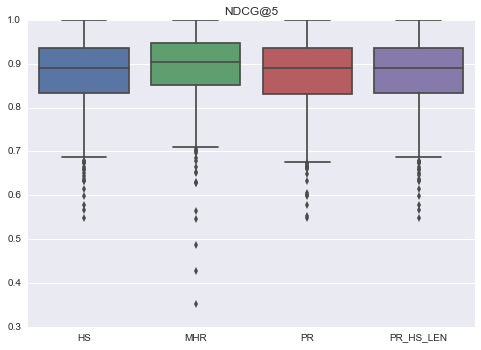

In [5]:
import seaborn as sns
k=5

ndcg_pr=ndcg.calc_ndcg(reviews_features,'pageRank',k) 
corr_pr=ndcg.calc_corr(reviews_features,'pageRank') 
print "PageRank ndcg="+str(np.mean(ndcg_pr))

ndcg_hs=ndcg.calc_ndcg(reviews_features,'hits',k) 
corr_hs=ndcg.calc_corr(reviews_features,'hits') 
print "HITs ndcg="+str(np.mean(ndcg_hs))

ndcg_mhr=ndcg.calc_ndcg(reviews_features,'powerWithStar',k) 
corr_mhr=ndcg.calc_corr(reviews_features,'powerWithStar') 
print "MHR ndcg="+str(np.mean(ndcg_mhr))

ndcg_prhslen=ndcg.calc_ndcg(reviews_features,'pr_hs_len',k) 
corr_prhslen=ndcg.calc_corr(reviews_features,'pr_hs_len') 
print "PR_HS_LEN ndcg="+str(np.mean(ndcg_prhslen))

#ndcg_svm=ndcg.calc_ndcg(pd.read_csv('data/best_prediction_svm.csv'),'svm',k) 
#corr_svm=ndcg.calc_corr(pd.read_csv('data/best_prediction_svm.csv'),'svm') 

#print "SVM ndcg="+str(np.mean(ndcg_svm))


tip={}
tip['HS']=ndcg_hs
tip['PR']=ndcg_pr
tip['PR_HS_LEN']=ndcg_prhslen
tip['MHR']=ndcg_mhr
#tip['SVM']=ndcg_svm
df = pd.DataFrame(tip)
ax = sns.boxplot(data=df)
#ax = sns.swarmplot(data=df, color=".25")
ax.set_title('NDCG@'+str(k))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

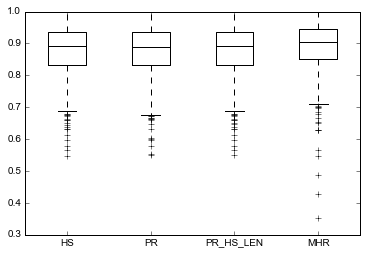

In [6]:

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt 
%matplotlib inline
# Create a figure instance

# Create an axes instance

data_to_plot = [ndcg_hs, ndcg_pr, ndcg_prhslen, ndcg_mhr]

# Create the boxplot
#plt.boxplot(data_to_plot, labels=["HR","PR","MHR"])





bp = plt.boxplot(data_to_plot, labels=["HS","PR","PR_HS_LEN","MHR"])
plt.setp(bp['boxes'], linewidth=1, color='black')
plt.setp(bp['fliers'], linewidth=1, color='black')
plt.setp(bp['medians'], linewidth=1, color='black')
plt.setp(bp['whiskers'], linewidth=1, color='black')


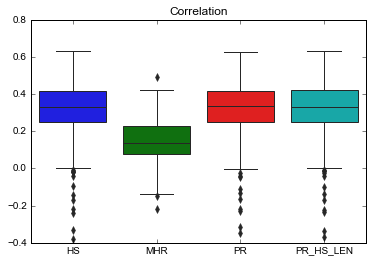

In [7]:
tip={}
tip['PR']=corr_pr
tip['HS']=corr_hs
tip['MHR']=corr_mhr
tip['PR_HS_LEN']=corr_prhslen
dftip=pd.DataFrame(tip)
dftip.head()
ax = sns.boxplot(data=dftip)
#ax = sns.swarmplot(data=dftip, color=".25")

ax.set_title('Correlation')